In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics


In [60]:
company=pd.read_csv("C:\\Users\\hp\\Downloads\\Company_Data.csv")

In [14]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
# hence no null values present in the data

In [8]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [9]:
# hence no duplicated values present in the data

In [21]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [13]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [19]:
df=pd.get_dummies(company,columns=['Urban','US','ShelveLoc'], drop_first=True)

In [68]:
df.isnull().sum()

Sales_Group         0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
Urban_Yes           0
US_Yes              0
ShelveLoc_Good      0
ShelveLoc_Medium    0
dtype: int64

In [69]:
df['Sales_Group'].fillna('low',inplace=True)

In [39]:
category = pd.cut(company['Sales'],bins=[0,5.39,9.32,17],labels=['low','moderate','high'])
df.insert(0,'Sales_Group',category)

# here the error has come because i tried to run the code after the row was inserted

ValueError: cannot insert Sales_Group, already exists

In [40]:
df.drop(['Sales'],axis = 1, inplace = True)

In [41]:
df

,Sales_Group,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Good,ShelveLoc_Medium
0,high,138,73,11,276,120,42,17,1,1,0,0
1,high,111,48,16,260,83,65,10,1,1,1,0
2,high,113,35,10,269,80,59,12,1,1,0,1
3,moderate,117,100,4,466,97,55,14,1,1,0,1
4,low,141,64,3,340,128,38,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,33,14,1,1,1,0
396,moderate,139,23,3,37,120,55,11,0,1,0,1
397,moderate,162,26,12,368,159,40,18,1,1,0,1
398,moderate,100,79,7,284,95,50,12,1,1,0,0


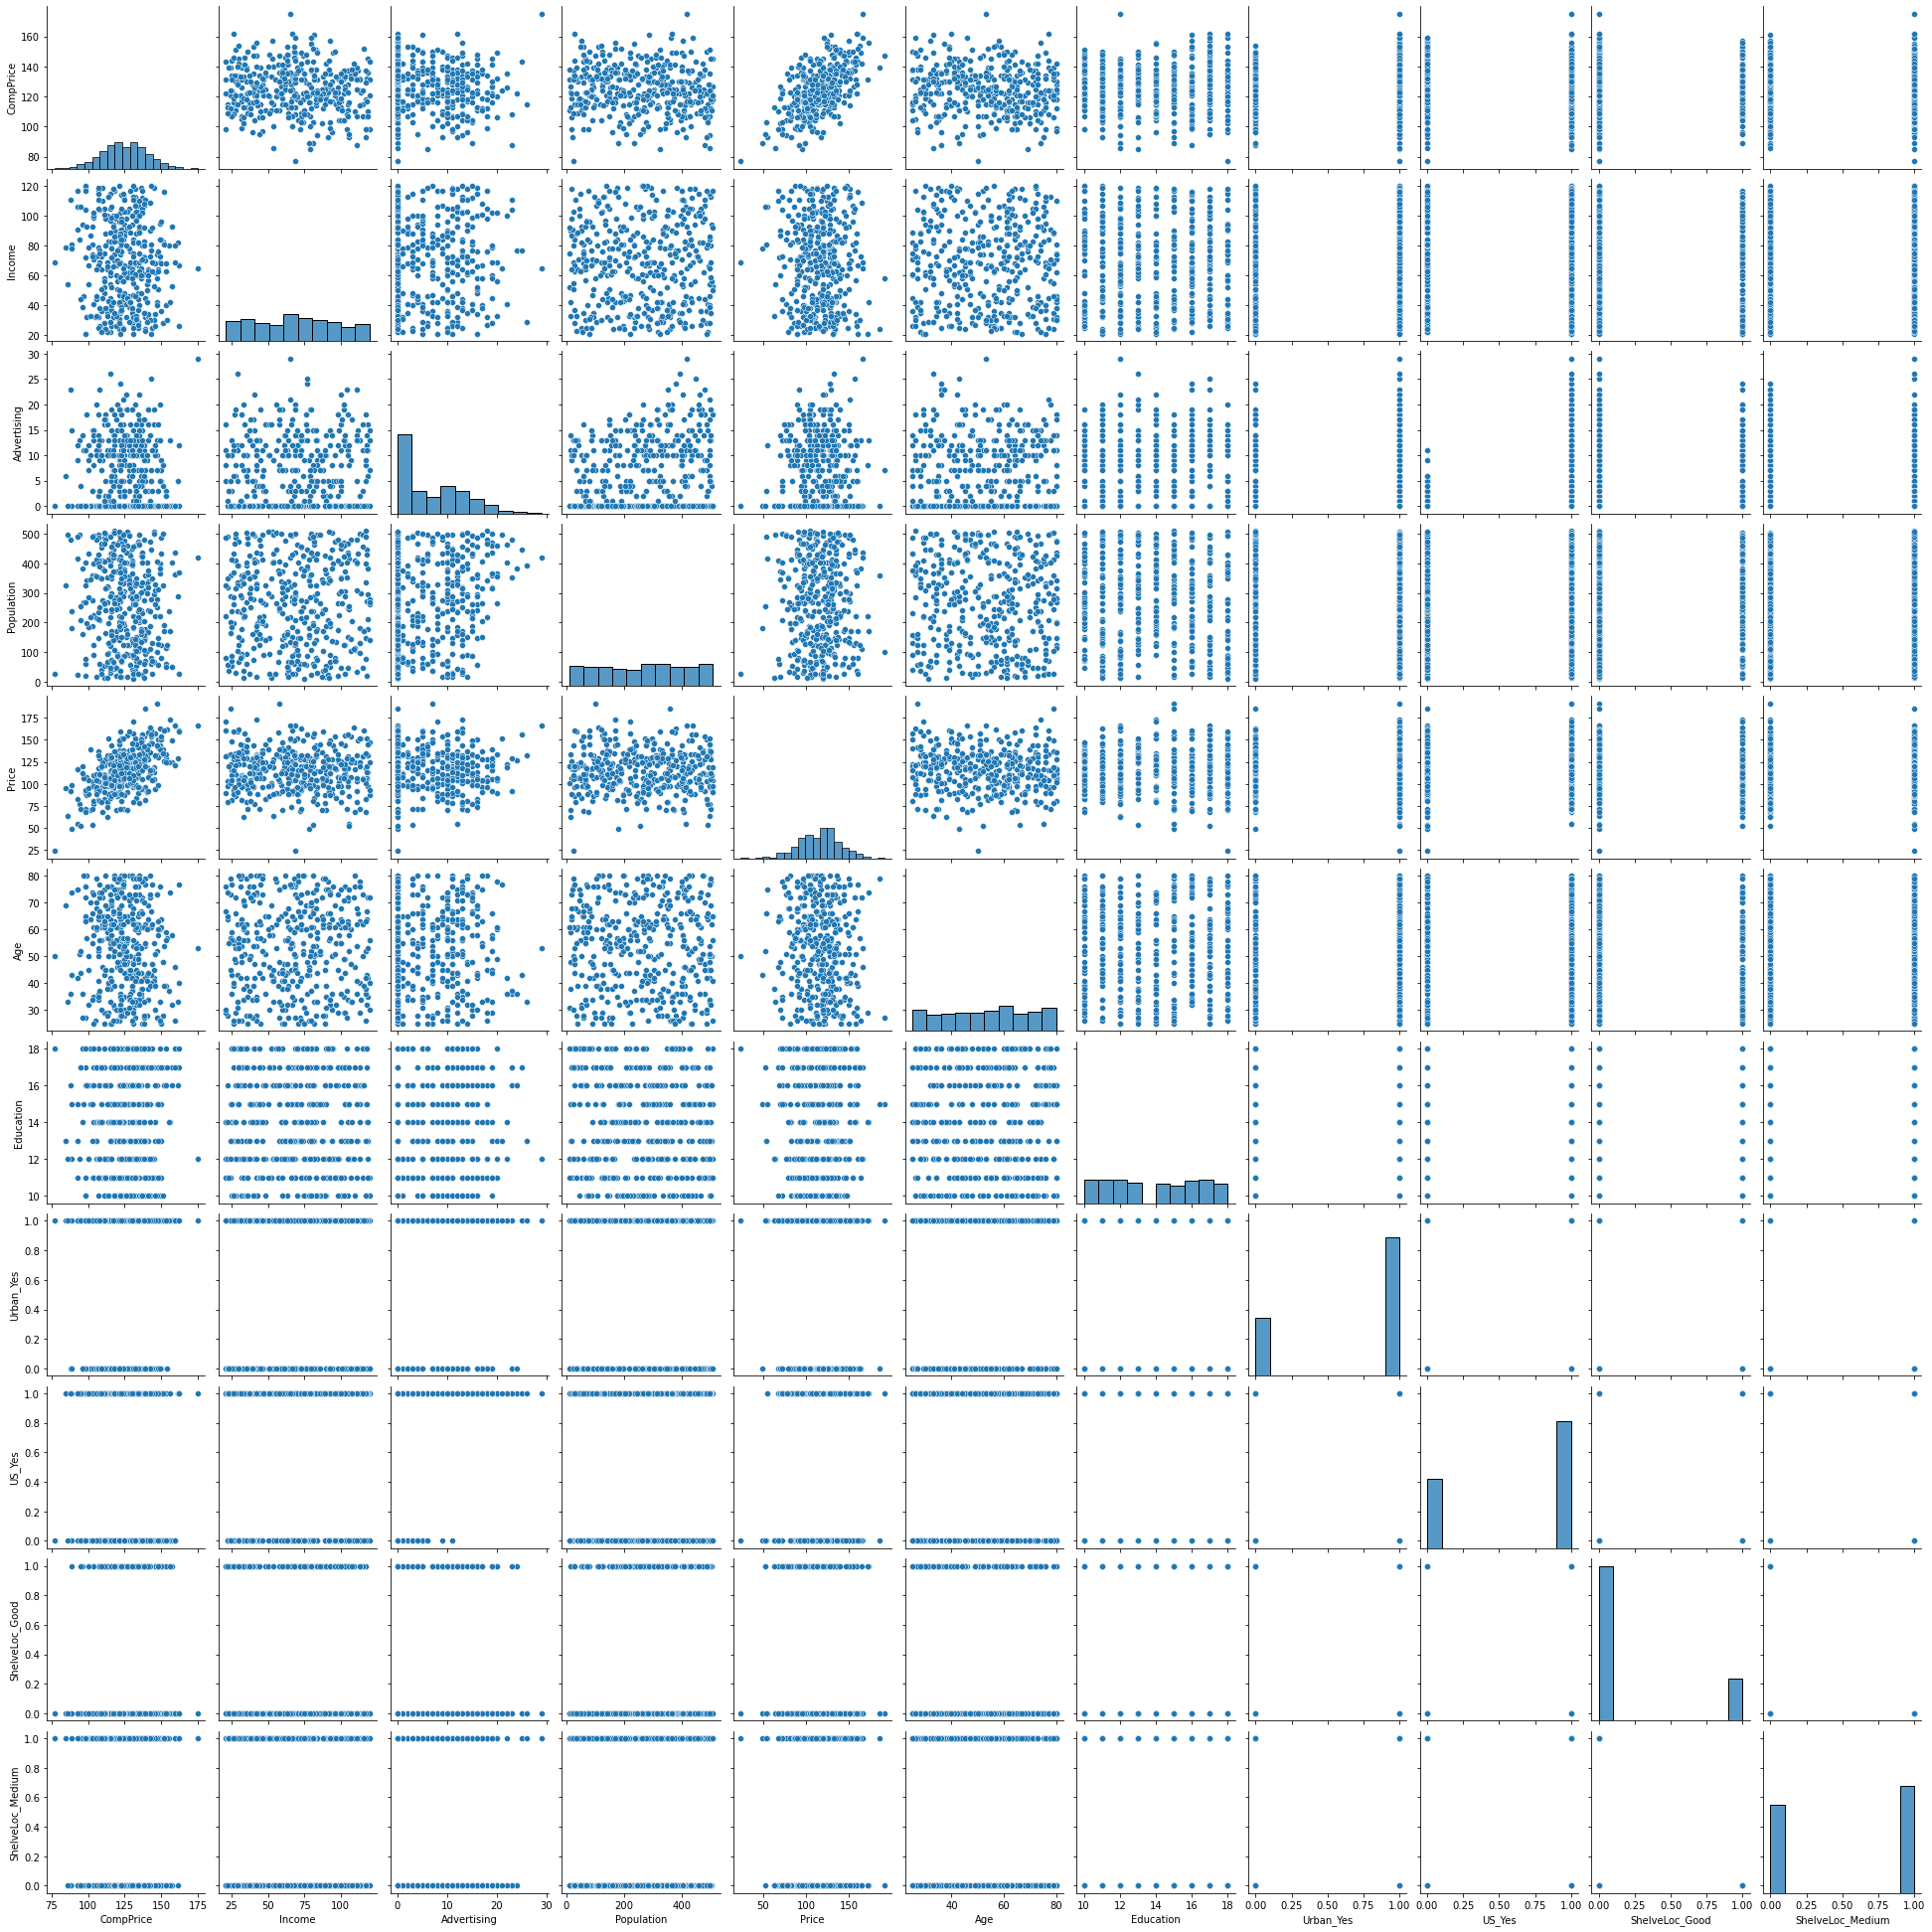

In [42]:
import seaborn as sns
sns.pairplot(df)


In [81]:
x = df.drop(['Sales_Group'], axis=1)
y = df['Sales_Group']
feature_list = list(df.columns)

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [76]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

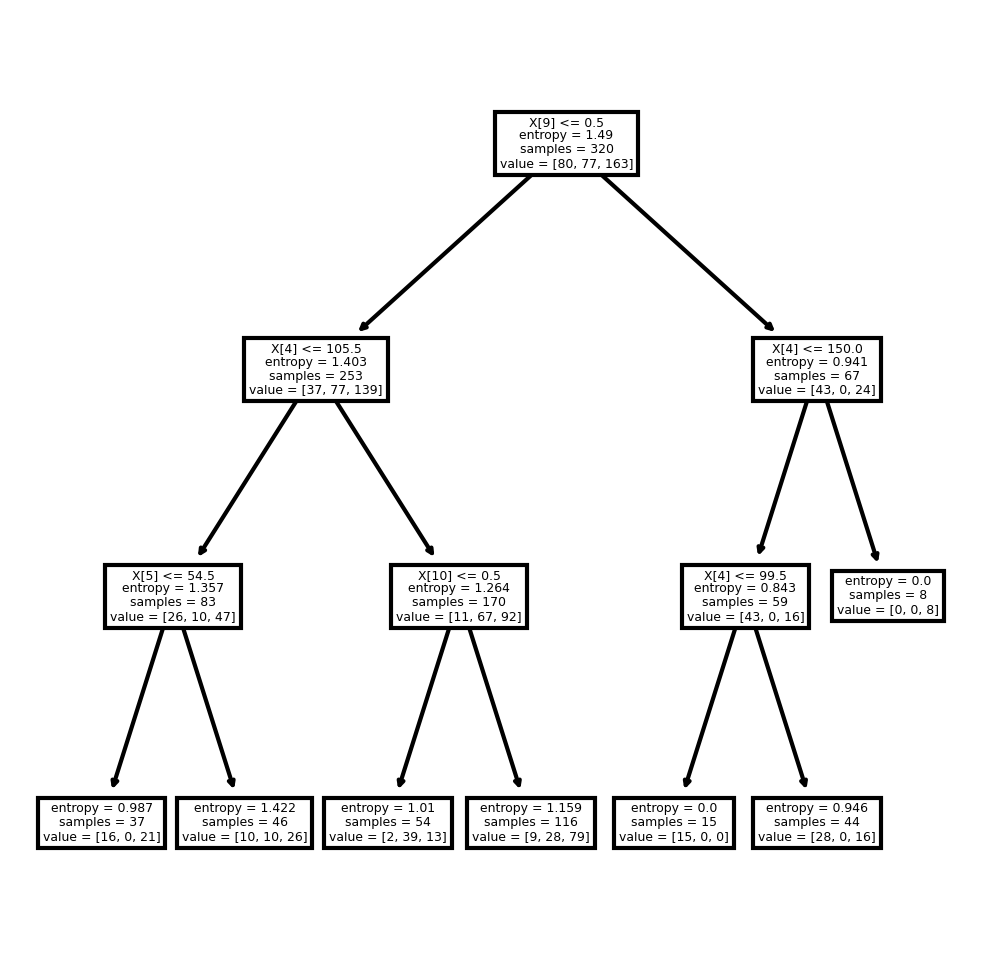

In [77]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
#PLot the decision tree
tree.plot_tree(model);

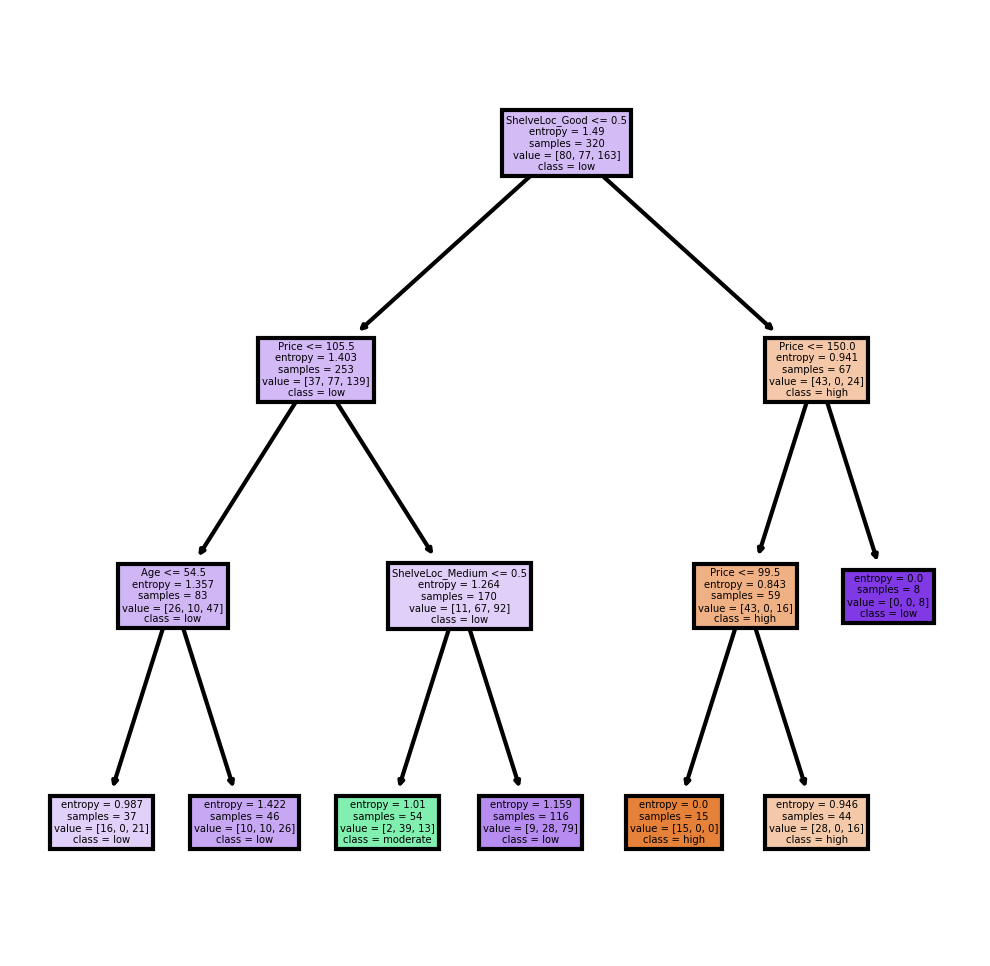

In [78]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_Yes','US_Yes','ShelveLoc_Good','ShelveLoc_Medium']
cn=['high','moderate','low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)    #dpi= dots per inch
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [82]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: US_Yes               Importance: 0.41
Variable: Population           Importance: 0.34
Variable: ShelveLoc_Good       Importance: 0.18
Variable: Price                Importance: 0.07
Variable: Sales_Group          Importance: 0.0
Variable: CompPrice            Importance: 0.0
Variable: Income               Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Education            Importance: 0.0
Variable: Urban_Yes            Importance: 0.0


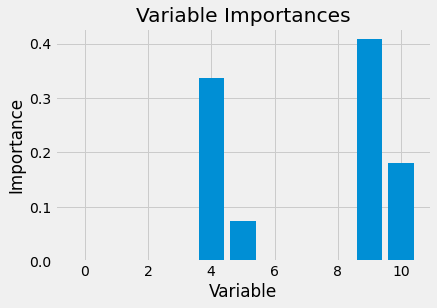

In [87]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# from the above plots we can conclude that population,price,us,shelvelocation good had  greater impact on sales  